In [124]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import json
import baseline
from encoder import *
from baseline import *
from decoder import *
from alphabet import *
from train import *
import torch
from matplotlib import pyplot as plt

torch.__version__

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'1.4.0'

In [150]:
LANGUAGE = 'Python'

def filter_ascii(strings):
    'Returns only the strings that can be encoded in ASCII.'
    l = []
    for s in strings:
        try:
            s.encode('ascii')
            if len(s) <= 80:
                l.append(s)
        except UnicodeEncodeError:
            pass
        
    return l

with open('dataset/medium.json') as f:
    multilang_dataset = json.load(f)
    dataset = multilang_dataset[LANGUAGE]
    
    dataset['train'] = filter_ascii(dataset['train'])
    dataset['dev'] = filter_ascii(dataset['dev'])
    dataset['test'] = filter_ascii(dataset['test'])
    
    tiny_dataset = {
        'train': dataset['train'][:50],
        'dev': dataset['train'][:50],
        'test': dataset['train'][:50],
    }
    
    print('{} training examples, {} validation examples, {} test exampless'.format(
        len(dataset['train']), 
        len(dataset['dev']),
        len(dataset['test'])))

76738 training examples, 9590 validation examples, 9616 test exampless


In [151]:
def generate_dumb_dataset():
    'Returns a dataset where all examples are the same string, which consists of 10 times the same letter.'

    SIZE = 200
    l = []

    for i in range(SIZE):
        l.append(random.choice('abcdefghijklmnopqrstuvwxyz') * random.choice([5, 10]))
        
    return {'train': l, 'dev': l, 'test': l}

dumb_dataset = generate_dumb_dataset()

In [152]:
device = torch.device(0) if torch.cuda.is_available() else torch.device('cpu')
print(device)

alphabet = AsciiOneHotEncoding(device)
encoder = baseline.UniformEncoder(0.9)
decoder = AutoCompleteDecoderModel(alphabet, hidden_size=64)
nencoder = NeuralEncoder(alphabet, epsilon=0.5, hidden_size=64)

cpu
hello darkness


In [ ]:
nencoder(["hello"])

In [146]:
def expected_initial_loss(input_string, epsilon, alphabet, lam):
    s, a = len(input_string), alphabet.size()
    return s/2.0 + lam*(s*math.log(a)-epsilon)

print(expected_initial_loss('ddddd',0.5,alphabet,10))

240.10151319598083


lam:  tensor(10., requires_grad=True)
batch:  ['ddddd']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['ddd']
per_prediction_loss:  tensor([29.1122], grad_fn=<SumBackward1>)
grad:  tensor([[-4.0009e-10, -6.5455e-10,  1.1578e-10,  ..., -9.2728e-11,
         -5.0189e-11, -9.0278e-11],
        [-2.5475e-09, -4.0080e-09,  6.6233e-10,  ..., -5.8527e-10,
         -3.6778e-10, -5.4992e-10],
        [ 3.7202e-10,  7.2577e-10, -1.6257e-10,  ...,  8.9990e-11,
          1.1289e-11,  1.0220e-10],
        ...,
        [-3.5533e-11, -2.7469e-10,  1.1180e-10,  ..., -1.5154e-11,
          6.1033e-11, -4.1753e-11],
        [-3.0619e-09, -4.8137e-09,  7.9436e-10,  ..., -7.0333e-10,
         -4.4314e-10, -6.6040e-10],
        [-3.5018e-10, -6.6098e-10,  1.4263e-10,  ..., -8.3966e-11,
         -1.7277e-11, -9.2734e-11]])
Epoch 0 iteration 0: loss = -291.122, tp = 29.20 lines/s, ETA 00h00m20s
batch:  ['tttt

grad:  tensor([[ 0.0025,  0.0044,  0.0029,  ...,  0.0019,  0.0016,  0.0027],
        [-0.0020, -0.0036, -0.0023,  ..., -0.0015, -0.0013, -0.0021],
        [-0.0044, -0.0077, -0.0050,  ..., -0.0033, -0.0029, -0.0047],
        ...,
        [-0.0031, -0.0055, -0.0036,  ..., -0.0024, -0.0021, -0.0033],
        [-0.0040, -0.0070, -0.0045,  ..., -0.0030, -0.0026, -0.0042],
        [ 0.0036,  0.0064,  0.0042,  ...,  0.0027,  0.0024,  0.0039]])
batch:  ['mmmmm']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['m']
per_prediction_loss:  tensor([32.7852], grad_fn=<SumBackward1>)
grad:  tensor([[ 4.6837e-05,  8.7030e-05,  5.1530e-05,  ...,  3.0197e-05,
          2.0806e-05,  3.9858e-05],
        [-6.6976e-05, -1.2455e-04, -7.3796e-05,  ..., -4.4168e-05,
         -3.0416e-05, -5.8277e-05],
        [-4.8903e-05, -9.0803e-05, -5.3728e-05,  ..., -3.0851e-05,
         -2.1267e-05, -4.0738e-05],
        

batch:  ['fffff']
encoded_batch_probs:  tensor([[0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['ff']
per_prediction_loss:  tensor([71.4551], grad_fn=<SumBackward1>)
grad:  tensor([[-1.6685e-33, -1.9693e-33, -1.7052e-33,  ...,  6.6245e-34,
          5.7541e-34,  7.3709e-34],
        [ 1.6717e-33,  1.9730e-33,  1.7085e-33,  ..., -6.6372e-34,
         -5.7652e-34, -7.3850e-34],
        [ 1.6727e-33,  1.9742e-33,  1.7095e-33,  ..., -6.6412e-34,
         -5.7686e-34, -7.3895e-34],
        ...,
        [ 1.6730e-33,  1.9745e-33,  1.7097e-33,  ..., -6.6422e-34,
         -5.7695e-34, -7.3906e-34],
        [ 1.6740e-33,  1.9757e-33,  1.7107e-33,  ..., -6.6461e-34,
         -5.7729e-34, -7.3950e-34],
        [-1.6725e-33, -1.9739e-33, -1.7092e-33,  ...,  6.6401e-34,
          5.7677e-34,  7.3883e-34]])
Epoch 0 iteration 24: loss = -711.551, tp = 29.22 lines/s, ETA 00h00m19s
batch:  ['jjjjjjjjjj']
encoded_batch_probs:  tensor(

per_prediction_loss:  tensor([107.9075], grad_fn=<SumBackward1>)
grad:  tensor([[ 6.2512e-17,  6.2670e-17,  6.2283e-17,  ..., -1.2100e-17,
         -1.0482e-17, -1.3452e-17],
        [-6.2551e-17, -6.2709e-17, -6.2322e-17,  ...,  1.2108e-17,
          1.0488e-17,  1.3460e-17],
        [-6.2555e-17, -6.2714e-17, -6.2327e-17,  ...,  1.2109e-17,
          1.0489e-17,  1.3461e-17],
        ...,
        [-6.2559e-17, -6.2717e-17, -6.2330e-17,  ...,  1.2110e-17,
          1.0490e-17,  1.3462e-17],
        [-6.2569e-17, -6.2727e-17, -6.2340e-17,  ...,  1.2112e-17,
          1.0491e-17,  1.3464e-17],
        [ 6.2553e-17,  6.2711e-17,  6.2325e-17,  ..., -1.2109e-17,
         -1.0489e-17, -1.3461e-17]])
Epoch 0 iteration 36: loss = -1080.075, tp = 29.57 lines/s, ETA 00h00m19s
batch:  ['yyyyyyyyyy']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993,
         0.4993, 0.4993, 0.4993]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['yyyy']
p

per_prediction_loss:  tensor([232.7107], grad_fn=<SumBackward1>)
grad:  tensor([[ 1.9296e-25,  1.9556e-25,  1.9212e-25,  ..., -4.1440e-26,
         -3.5835e-26, -4.9870e-26],
        [-1.9304e-25, -1.9564e-25, -1.9220e-25,  ...,  4.1457e-26,
          3.5850e-26,  4.9891e-26],
        [-1.9305e-25, -1.9565e-25, -1.9221e-25,  ...,  4.1459e-26,
          3.5851e-26,  4.9893e-26],
        ...,
        [-1.9306e-25, -1.9566e-25, -1.9222e-25,  ...,  4.1461e-26,
          3.5853e-26,  4.9895e-26],
        [-1.9308e-25, -1.9568e-25, -1.9224e-25,  ...,  4.1465e-26,
          3.5856e-26,  4.9900e-26],
        [ 1.9304e-25,  1.9564e-25,  1.9220e-25,  ..., -4.1457e-26,
         -3.5850e-26, -4.9891e-26]])
batch:  ['tttttttttt']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993,
         0.4993, 0.4993, 0.4993]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['tttttt']
per_prediction_loss:  tensor([222.9571], grad_fn=<SumBackward1>)
grad:  t

grad:  tensor([[ 2.3144e-17,  2.3134e-17,  2.3106e-17,  ..., -4.9427e-18,
         -4.0152e-18, -5.0307e-18],
        [-2.3153e-17, -2.3143e-17, -2.3115e-17,  ...,  4.9447e-18,
          4.0168e-18,  5.0327e-18],
        [-2.3153e-17, -2.3143e-17, -2.3115e-17,  ...,  4.9447e-18,
          4.0168e-18,  5.0327e-18],
        ...,
        [-2.3154e-17, -2.3144e-17, -2.3116e-17,  ...,  4.9449e-18,
          4.0169e-18,  5.0329e-18],
        [-2.3156e-17, -2.3146e-17, -2.3118e-17,  ...,  4.9454e-18,
          4.0173e-18,  5.0334e-18],
        [ 2.3153e-17,  2.3143e-17,  2.3114e-17,  ..., -4.9446e-18,
         -4.0167e-18, -5.0326e-18]])
Epoch 0 iteration 60: loss = -2933.077, tp = 29.59 lines/s, ETA 00h00m18s
batch:  ['jjjjjjjjjj']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993,
         0.4993, 0.4993, 0.4993]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['jjjjj']
per_prediction_loss:  tensor([306.5880], grad_fn=<SumBackward1>)


grad:  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Epoch 0 iteration 72: loss = -1599.410, tp = 29.55 lines/s, ETA 00h00m17s
batch:  ['mmmmmmmmmm']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993,
         0.4993, 0.4993, 0.4993]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['mmmmmm']
per_prediction_loss:  tensor([379.3360], grad_fn=<SumBackward1>)
grad:  tensor([[ 1.7798e-16,  1.7793e-16,  1.7774e-16,  ..., -3.5140e-17,
         -3.0092e-17, -3.8762e-17],
        [-1.7805e-16, -1.7800e-16, -1.7781e-16,  ...,  3.5153e-17,
          3.0104e-17,  3.8777e-17],
        [-1.7805e-16, -1.7800e-16, -1.7782e-16,  ...,  3.5154e-17,
          3.0104e-17,  3.8778e-17],
        ...,
        [-1.7806e-16, -1.7801e-16, -1.7782e-16, 

grad:  tensor([[ 3.8190e-19,  3.8220e-19,  3.8111e-19,  ..., -7.9525e-20,
         -6.9655e-20, -8.7284e-20],
        [-3.8206e-19, -3.8236e-19, -3.8127e-19,  ...,  7.9558e-20,
          6.9684e-20,  8.7321e-20],
        [-3.8207e-19, -3.8236e-19, -3.8127e-19,  ...,  7.9559e-20,
          6.9685e-20,  8.7322e-20],
        ...,
        [-3.8208e-19, -3.8238e-19, -3.8129e-19,  ...,  7.9563e-20,
          6.9688e-20,  8.7326e-20],
        [-3.8213e-19, -3.8243e-19, -3.8133e-19,  ...,  7.9572e-20,
          6.9696e-20,  8.7336e-20],
        [ 3.8206e-19,  3.8236e-19,  3.8127e-19,  ..., -7.9558e-20,
         -6.9685e-20, -8.7322e-20]])
Epoch 0 iteration 84: loss = -1250.649, tp = 29.43 lines/s, ETA 00h00m17s
batch:  ['zzzzz']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['zzz']
per_prediction_loss:  tensor([245.2150], grad_fn=<SumBackward1>)
grad:  tensor([[ 7.4689e-25,  7.5154e-25,  7.4121

grad:  tensor([[ 3.6041e-23,  3.6280e-23,  3.5802e-23,  ..., -7.5629e-24,
         -6.4793e-24, -8.3411e-24],
        [-3.6054e-23, -3.6294e-23, -3.5816e-23,  ...,  7.5659e-24,
          6.4818e-24,  8.3443e-24],
        [-3.6055e-23, -3.6295e-23, -3.5816e-23,  ...,  7.5660e-24,
          6.4819e-24,  8.3445e-24],
        ...,
        [-3.6057e-23, -3.6296e-23, -3.5818e-23,  ...,  7.5664e-24,
          6.4822e-24,  8.3449e-24],
        [-3.6061e-23, -3.6300e-23, -3.5822e-23,  ...,  7.5672e-24,
          6.4829e-24,  8.3458e-24],
        [ 3.6054e-23,  3.6294e-23,  3.5816e-23,  ..., -7.5659e-24,
         -6.4818e-24, -8.3443e-24]])
Epoch 0 iteration 98: loss = -3074.876, tp = 29.98 lines/s, ETA 00h00m16s
batch:  ['zzzzz']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['zz']
per_prediction_loss:  tensor([301.9510], grad_fn=<SumBackward1>)
grad:  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
   

grad:  tensor([[ 2.7874e-19,  2.7892e-19,  2.7822e-19,  ..., -6.0910e-20,
         -5.3284e-20, -6.6767e-20],
        [-2.7882e-19, -2.7900e-19, -2.7830e-19,  ...,  6.0928e-20,
          5.3300e-20,  6.6787e-20],
        [-2.7883e-19, -2.7901e-19, -2.7831e-19,  ...,  6.0930e-20,
          5.3301e-20,  6.6788e-20],
        ...,
        [-2.7884e-19, -2.7902e-19, -2.7832e-19,  ...,  6.0931e-20,
          5.3302e-20,  6.6790e-20],
        [-2.7886e-19, -2.7904e-19, -2.7834e-19,  ...,  6.0937e-20,
          5.3307e-20,  6.6796e-20],
        [ 2.7883e-19,  2.7900e-19,  2.7831e-19,  ..., -6.0929e-20,
         -5.3300e-20, -6.6787e-20]])
batch:  ['qqqqq']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['']
per_prediction_loss:  tensor([369.1162], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..

grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 0 iteration 128: loss = nan, tp = 29.73 lines/s, ETA 00h00m15s
batch:  ['iiiii']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['iiii']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['dddddddddd']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0

per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 0 iteration 146: loss = nan, tp = 29.54 lines/s, ETA 00h00m15s
batch:  ['tttttttttt']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993,
         0.4993, 0.4993, 0.4993]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['t']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])

per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['mmmmmmmmmm']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993,
         0.4993, 0.4993, 0.4993]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['mmmmmmmm']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 0 iteration 164: loss = nan, tp = 29.31 lines/s, ETA 00

per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['nnnnnnnnnn']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993,
         0.4993, 0.4993, 0.4993]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['nnnnn']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 0 iteration 182: loss = nan, tp = 29.35 lines/s, ETA 00h00

grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['iiiiiiiiii']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993,
         0.4993, 0.4993, 0.4993]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['iiiii']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 0 iteration 200: loss = nan, tp = 29.34 lines/s, ETA 00h00m13s
batch:  ['eeeeeeeeee']
encoded_batch_probs:  tensor([[0

batch:  ['wwwwwwwwww']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993,
         0.4993, 0.4993, 0.4993]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['wwwwwwww']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 1 iteration 17: loss = nan, tp = 29.34 lines/s, ETA 00h00m12s
batch:  ['eeeee']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['eee']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan,

batch:  ['xxxxx']
encoded_batch_probs:  tensor([[0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['x']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 1 iteration 35: loss = nan, tp = 29.33 lines/s, ETA 00h00m12s
batch:  ['fffff']
encoded_batch_probs:  tensor([[0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['fff']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan,

grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 1 iteration 53: loss = nan, tp = 29.40 lines/s, ETA 00h00m11s
batch:  ['pppppppppp']
encoded_batch_probs:  tensor([[0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992,
         0.4992, 0.4992, 0.4992]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['ppppppp']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['aaaaa']
encoded_batch_probs:  tensor([[0.499

per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['nnnnn']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['nnnn']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 1 iteration 71: loss = nan, tp = 29.23 lines/s, ETA 00h00m11s
batch:  ['uuuuuuuuuu']
encoded_batch_probs: 

grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['jjjjj']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['j']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 1 iteration 89: loss = nan, tp = 29.20 lines/s, ETA 00h00m10s
batch:  ['uuuuuuuuuu']
encoded_batch_probs:  tensor([[0.4992, 0.4992, 0.4992, 0.4992, 0.4993, 0.4993, 0.499

Epoch 1 iteration 107: loss = nan, tp = 29.33 lines/s, ETA 00h00m09s
batch:  ['sssss']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['s']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['ccccc']
encoded_batch_probs:  tensor([[0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['ccc']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan

grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 1 iteration 123: loss = nan, tp = 29.12 lines/s, ETA 00h00m09s
batch:  ['eeeeeeeeee']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993,
         0.4993, 0.4993, 0.4993]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['eeeeeee']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['mmmmm']
encoded_batch_probs:  tensor([[0.49

per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 1 iteration 141: loss = nan, tp = 29.10 lines/s, ETA 00h00m08s
batch:  ['lllll']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['ll']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['aaaaaaaaaa']
encoded_batch_probs:  

encoded_batch_strings: ['hhhhhh']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['rrrrrrrrrr']
encoded_batch_probs:  tensor([[0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992,
         0.4992, 0.4992, 0.4992]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['rrrrrr']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 1 iteration 161: loss =

grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 1 iteration 177: loss = nan, tp = 29.13 lines/s, ETA 00h00m07s
batch:  ['eeeeeeeeee']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993,
         0.4993, 0.4993, 0.4993]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['eeee']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['mmmmm']
encoded_batch_probs:  tensor([[0.4992,

per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['iiiiiiiiii']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993,
         0.4993, 0.4993, 0.4993]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['iiii']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 1 iteration 197: loss = nan, tp = 29.17 lines/s, ETA 00h00m

grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['jjjjj']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['jjjj']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 2 iteration 14: loss = nan, tp = 29.23 lines/s, ETA 00h00m06s
batch:  ['nnnnn']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]

Epoch 2 iteration 30: loss = nan, tp = 29.17 lines/s, ETA 00h00m05s
batch:  ['ffffffffff']
encoded_batch_probs:  tensor([[0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992,
         0.4992, 0.4992, 0.4992]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['fff']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['lllll']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['ll']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan, 

Epoch 2 iteration 48: loss = nan, tp = 29.17 lines/s, ETA 00h00m05s
batch:  ['mmmmm']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['m']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['tttttttttt']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993,
         0.4993, 0.4993, 0.4993]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['ttttt']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,

grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['rrrrrrrrrr']
encoded_batch_probs:  tensor([[0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992,
         0.4992, 0.4992, 0.4992]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['rrrrrrr']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 2 iteration 68: loss = nan, tp = 29.19 lines/s, ETA 00h00m04s
batch:  ['qqqqqqqqqq']
encoded_batch_probs:  tensor([[

grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['lllll']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['ll']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 2 iteration 86: loss = nan, tp = 29.20 lines/s, ETA 00h00m03s
batch:  ['ccccc']
encoded_batch_probs:  tensor([[0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992]],

per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 2 iteration 104: loss = nan, tp = 29.23 lines/s, ETA 00h00m03s
batch:  ['nnnnnnnnnn']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993,
         0.4993, 0.4993, 0.4993]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['nnnnnnn']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, 

Epoch 2 iteration 122: loss = nan, tp = 29.24 lines/s, ETA 00h00m02s
batch:  ['tttttttttt']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993,
         0.4993, 0.4993, 0.4993]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['tttttt']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['pppppppppp']
encoded_batch_probs:  tensor([[0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992,
         0.4992, 0.4992, 0.4992]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['ppppp']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, na

grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 2 iteration 140: loss = nan, tp = 29.22 lines/s, ETA 00h00m01s
batch:  ['mmmmm']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['mm']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['tttttttttt']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4

grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
batch:  ['sssss']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['sss']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 2 iteration 158: loss = nan, tp = 29.18 lines/s, ETA 00h00m01s
batch:  ['ddddd']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]

batch:  ['mmmmm']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993]],
       grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['mmmm']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 2 iteration 176: loss = nan, tp = 29.18 lines/s, ETA 00h00m00s
batch:  ['wwwwwwwwww']
encoded_batch_probs:  tensor([[0.4992, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993, 0.4993,
         0.4993, 0.4993, 0.4993]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['wwww']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, n

per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])
Epoch 2 iteration 194: loss = nan, tp = 29.20 lines/s, ETA 00h00m00s
batch:  ['xxxxxxxxxx']
encoded_batch_probs:  tensor([[0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992, 0.4992,
         0.4992, 0.4992, 0.4992]], grad_fn=<SqueezeBackward1>)
encoded_batch_strings: ['xxxx']
per_prediction_loss:  tensor([nan], grad_fn=<SumBackward1>)
grad:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan

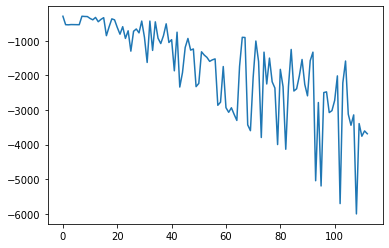

In [149]:
parameters = {
    'learning_rate': 5e-3,
    'verbose': True,
    'batch_size': 1,
    'init_scale': 0.01,
    'epochs': 3,
    'log_every':2
}

train_loss_history = train(nencoder, decoder, dumb_dataset, parameters, device)
plt.plot(train_loss_history)

In [123]:
ps = torch.tensor([0.3, 0.8], requires_grad=True)
bs = torch.bernoulli(ps)
s = bs.sum()
print(s)
s.backward()
print(bs)
print(bs.grad)

from torch.distributions import Categorical

b = Categorical(ps)
mask = b.sample()
# next_state, reward = env.step(action)
# loss = -m.log_prob(action) * reward
loss = b.log_prob(mask)
loss.backward()
print(loss)
print(mask.grad)

tensor(2., grad_fn=<SumBackward0>)
tensor([1., 1.], grad_fn=<BernoulliBackward0>)
None
tensor(-0.3185, grad_fn=<SqueezeBackward1>)
None


In [109]:
bs._grad

# End-to-end samples

In [47]:
SPLIT = 'train'

import copy

s = random.choice(dumb_dataset[SPLIT])
compressed = encoder.encode(s)
decompressed = decoder([compressed])

print('String:', repr(s))
print('Encoded:', repr(compressed))
print('Decoded:', repr(decompressed[0]))
print(len(decompressed))

String: 'ffffffffff'
Encoded: 'ffffffffff'
Decoded: 'd}{}\x13d}}|d}\x13\x13d})dddA}}\x13})}7d}}}|}}\x13d}\x13d}A|\x13}}Z(AA|\x13}}{}}}K}}AP}d}}\x13}d}}}}\x13d}j}}\x13Z\x13A}j}}}\x13dd})}\x13}Z\x13}|d\x13\x13}}}t})}\x13d}}dZ}}|}}d}Z}}dZAA}\x13})}dd}}dt}\x04d}dA}}}}A})d}}d}d}A}}\x04}A}A\x13d|A}}}}\x13A}\x13d}}}dA}}})d}d}{)\x13|A'
1


In [9]:
def top1accuracy(dataset):
    return len(list(filter(lambda s: s == decoder([encoder.encode(s)])[0],
                         dataset)))/len(dataset)
print(top1accuracy(dumb_dataset[SPLIT]))

0.25
